### Read the data

In [1]:
import json
from tqdm import tqdm # google this

### Read tweets into a list
You are going to use `try ... except ...` a lot in this case study

In [4]:
%%time 
# google this

tweets = []
with open("data/french_tweets.json","r") as fp:
    for line in tqdm(fp):
        try:
            tweets.append(json.loads(line))
        except:
            pass

216912it [00:40, 5388.17it/s] 

CPU times: user 34.1 s, sys: 6.88 s, total: 41 s
Wall time: 40.3 s


In [10]:
!wc -l data/french_tweets.json

216912 data/french_tweets.json


In [8]:
len(tweets)

214936

In [9]:
type(tweets[0])

dict

### Examine the first tweet

In [7]:
from pprint import pprint # pretty print
pprint(tweets[0])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Wed Apr 26 13:30:45 +0000 2017',
 'entities': {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'filter_level': 'low',
 'geo': None,
 'id': 857225437122097152,
 'id_str': '857225437122097152',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'fr',
 'place': {'attributes': {},
           'bounding_box': {'coordinates': [[[-0.061141, 49.208997],
                                             [-0.061141, 49.250115],
                                             [-0.032199, 49.250115],
                                             [-0.032199, 49.208997]]],
                            'type': 'Polygon'},
           'country': 'France',
           'country_code': 'FR',
           'full_name': 'Dozulé, France',
           'id':

### Attempt to build a simple pandas DataFrame

In [14]:
import pandas as pd

Let's try to extract a list of tuples with the id and the tweet creation time.

In [12]:
ids = list(map(lambda tweet: (tweet["id"], tweet['created_at']), tweets))

KeyError: 'id'

Whoops! Some tweet actually doesn't have the `id` key!
1. How will you solve it?
2. How will you ensure that the extracted info comes from the same tweet?
    > If you extract `id` and `created_at` from two independent queries, the length of the     vecotrs may not match, etc.

### Build a word cloud

In [22]:
def tweet_to_tweet_text(tweet_dict):
    '''
    extract information from a tweet to get the actual tweet content
    
    '''
    try:
        return tweet_dict["text"]
    except KeyError: # if there is no `text` key in the dictionary
        return ""

install an additional package

In [20]:
%%capture
!pip install wordcloud

### Let's draw a word cloud
Reference: https://www.geeksforgeeks.org/generating-word-cloud-python/

In [ ]:
# Python program to generate WordCloud 
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

In [28]:
# since we work with French, we want to remove Frech stopwords
# Google french stop words you find a new library to help you, read its doc to know how to use it
# https://pypi.org/project/stop-words/
!pip install stop-words

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32916 sha256=c94feff882e27849464d6a8c6ee8abb21f80456b1317e4b247760ca29989b93d
  Stored in directory: /home/ubuntu/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [31]:
from stop_words import get_stop_words

stop_words = get_stop_words('fr')

In [ ]:
%%time
stopwords = set(stop_words) 

You may want to add some other stopwords, you may only notice it after actually running the first version of the code

Next code block is a one-liner

1. iterate through the list of tweets object
2. call the function `tweet_to_tweet_text` to access the tweet text
3. then split it into words
4. obtain a list of list

In [33]:
tweet_words_list = [tweet_to_tweet_text(tweet).split() 
                    for tweet in tqdm(tweets)] # a list of lists

100%|██████████| 214936/214936 [00:02<00:00, 97175.09it/s] 

CPU times: user 1.43 s, sys: 1.03 s, total: 2.46 s
Wall time: 2.44 s


How to turn this list of lists into a single list? 
Google: https://stackoverflow.com/questions/716477/join-list-of-lists-in-python

In [34]:
import itertools
all_tweet_words = " ".join(list(itertools.chain.from_iterable(tweet_words_list)))

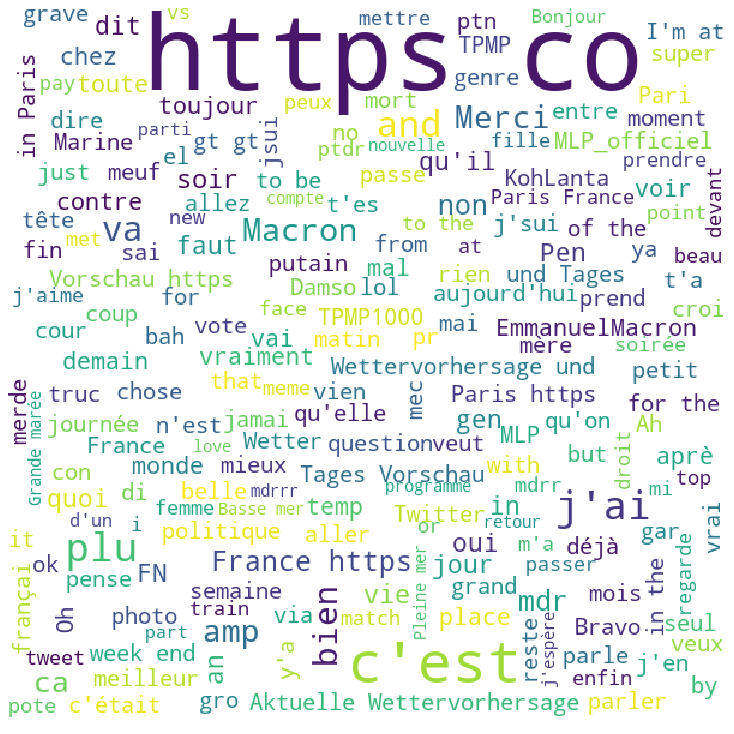

In [36]:
wordcloud = WordCloud(width = 600, height = 600, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(all_tweet_words) 

# plot the WordCloud image					 
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

Now you may want to remove `https` as a stop word. Try to understand why it is there?

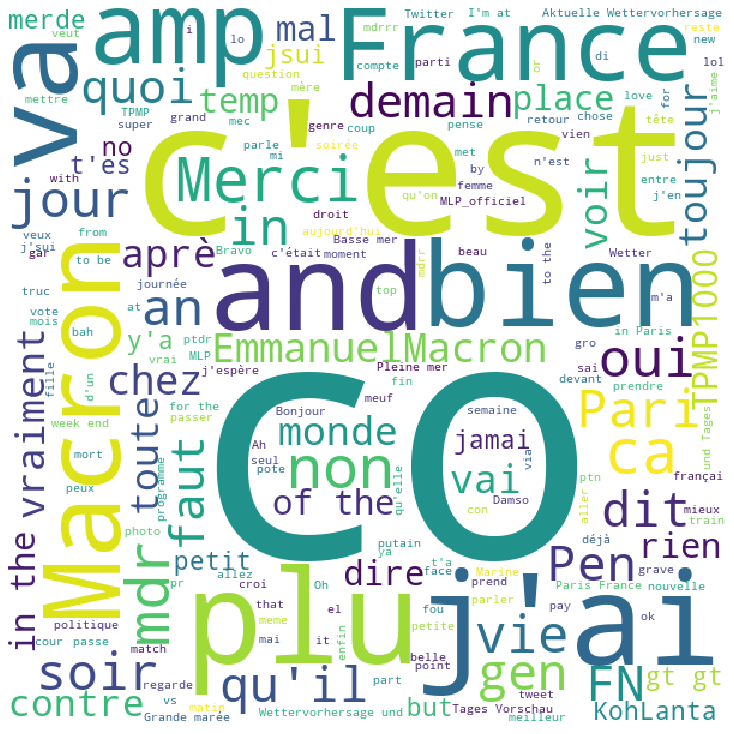

CPU times: user 24.4 s, sys: 1.23 s, total: 25.6 s
Wall time: 25.6 s


In [37]:
%%time
stopwords.add("https")
wordcloud = WordCloud(width = 600, height = 600, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(all_tweet_words) 

# plot the WordCloud image					 
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 